<a href="https://colab.research.google.com/github/dhanushm18/Rural-roots/blob/main/Sentiment_Analysis(ML_%26_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kazanova_sentiment140_path = kagglehub.dataset_download('kazanova/sentiment140')

print('Data source import complete.')


100%|██████████| 80.9M/80.9M [00:00<00:00, 119MB/s]

Extracting files...


Data source import complete.


# Sentiment Analysis Using Various ML Classifiers ans well as using Recurrent Neural Network

### In this notebook you will see text precessing on twitter data set and after that I have performed different Machine Learning Algorithms on the data such as **Logistic Regression, RandomForestClassifier, SVC, Naive Bayes** to classifiy positive and negative tweets. After that I have also built a RNN network which is the best fit for such textual sentiment analysis, since it's a Sequential Dataset which is requirement for RNN network.

#### Let's Dive into it.

# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [22]:
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [2]:
pip install pandas numpy seaborn matplotlib wordcloud nltk scikit-learn tensorflow tensorflow-datasets


# Loading Dataset <a id="2"></a>

In [3]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Construct a tf.data.Dataset
import pandas as pd
data = pd.read_csv('/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [13]:
data = data.sample(frac=1)
data = data[:200000]

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

* date : the date of the tweet (Sat May 16 23:58:44 PDT 2009)
* polarity : the polarity of the tweet (0 = negative 4 = positive)
* user : the user that tweeted (TerraScene)
* text : the text of the tweet (i'm 10x cooler than all of you)

In [14]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [15]:
data.head(10)

,polarity,id,date,query,user,text
1364664,4,2049818889,Fri Jun 05 17:33:20 PDT 2009,NO_QUERY,littleburger,@mscandace00 fix that
810499,4,1469787350,Tue Apr 07 07:25:10 PDT 2009,NO_QUERY,keraia,there was a kid called Jazzie in the disney st...
774697,0,2321604050,Wed Jun 24 21:17:40 PDT 2009,NO_QUERY,rbflygal,Night all maybe I will get some decent sleep t...
1589084,4,2191179044,Tue Jun 16 04:42:20 PDT 2009,NO_QUERY,tiinasellout,is now at twitter!
127366,0,1834702897,Mon May 18 03:55:11 PDT 2009,NO_QUERY,Shannon_Warner,Think i'm getting sick
1460829,4,2063880477,Sun Jun 07 04:26:17 PDT 2009,NO_QUERY,blackHeart21Red,Waiting to go to my bros house well excited A...
487934,0,2182314908,Mon Jun 15 13:00:27 PDT 2009,NO_QUERY,BethanyLucas,going to work on such a pretty day
335162,0,2013725672,Tue Jun 02 23:24:34 PDT 2009,NO_QUERY,DanielleCupe,"My husband got me Sims 3, but I can't really p..."
1278007,4,2001383759,Tue Jun 02 00:42:30 PDT 2009,NO_QUERY,killkillkill,@katiewest No TV in the bedroom......... so we...
12860,0,1552003593,Sat Apr 18 10:32:05 PDT 2009,NO_QUERY,ladawn,I like being reminded of how lame I am. Keeps ...


In [16]:
data['polarity'].unique()

array([4, 0])

In [17]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1364664,1,2049818889,Fri Jun 05 17:33:20 PDT 2009,NO_QUERY,littleburger,@mscandace00 fix that
810499,1,1469787350,Tue Apr 07 07:25:10 PDT 2009,NO_QUERY,keraia,there was a kid called Jazzie in the disney st...
774697,0,2321604050,Wed Jun 24 21:17:40 PDT 2009,NO_QUERY,rbflygal,Night all maybe I will get some decent sleep t...
1589084,1,2191179044,Tue Jun 16 04:42:20 PDT 2009,NO_QUERY,tiinasellout,is now at twitter!
127366,0,1834702897,Mon May 18 03:55:11 PDT 2009,NO_QUERY,Shannon_Warner,Think i'm getting sick


In [18]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.500720,1.998979e+09
std,0.500001,1.936041e+08
min,0.000000,1.467813e+09
25%,0.000000,1.956960e+09
50%,1.000000,2.002185e+09
75%,1.000000,2.177145e+09
max,1.000000,2.329205e+09


In [19]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  100144
No. of negative tagged sentences is: 99856


In [20]:
# get a word count per of text
def word_count(words):
    return len(words.split())

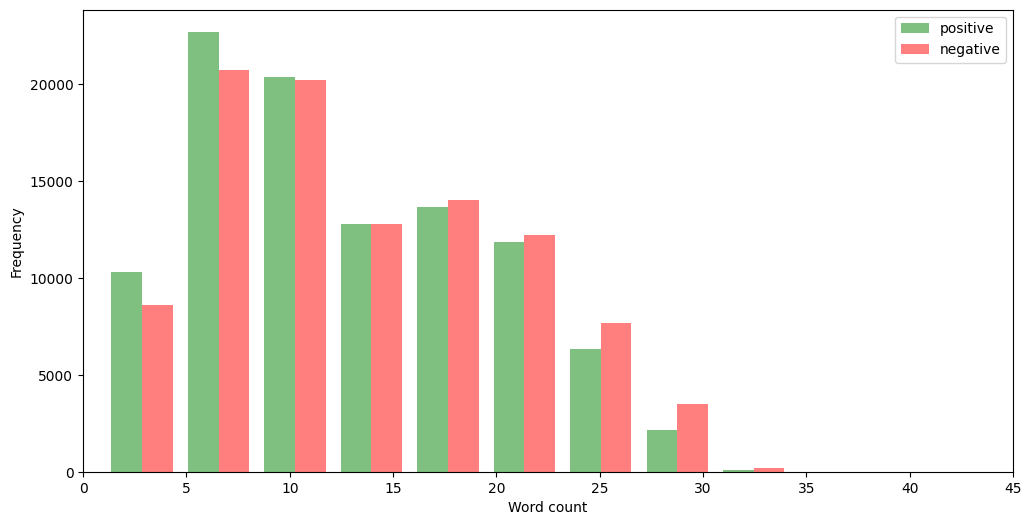

In [23]:
# plot word count distribution for both positive and negat
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [24]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 64837),
 ('and', 36997),
 ('you', 29648),
 ('for', 26661),
 ('have', 17858),
 ('that', 16279),
 ('just', 15783),
 ("i'm", 15742),
 ('but', 15518),
 ('with', 14340),
 ('was', 12955),
 ('not', 12891),
 ('this', 11022),
 ('get', 10011),
 ('good', 9820),
 ('are', 9619),
 ('all', 9295),
 ('like', 9191),
 ('out', 8589),
 ('your', 8239)]

# Data Processing <a id="4"></a>

In [25]:
sns.countplot(data['polarity'])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b207e47a520> (for post_execute):


KeyboardInterrupt: 

Exception ignored in: <function _xla_gc_callback at 0x7b1fdc676ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


Error in callback <function flush_figures at 0x7b207e478040> (for post_execute):


KeyboardInterrupt: 

In [26]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [27]:
data.drop('id', axis=1, inplace=True)

In [28]:
data.head(10)

,polarity,text
1364664,1,@mscandace00 fix that
810499,1,there was a kid called Jazzie in the disney st...
774697,0,Night all maybe I will get some decent sleep t...
1589084,1,is now at twitter!
127366,0,Think i'm getting sick
1460829,1,Waiting to go to my bros house well excited A...
487934,0,going to work on such a pretty day
335162,0,"My husband got me Sims 3, but I can't really p..."
1278007,1,@katiewest No TV in the bedroom......... so we...
12860,0,I like being reminded of how lame I am. Keeps ...


In [29]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

,0
polarity,0.0
text,0.0


In [30]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [31]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'as', "she's", 'more', 'and', 't', 'our', 're', 'was', "won't", 'haven', 'about', 'out', 'themselves', 'only', "that'll", 'can', 'against', 'himself', 'not', 'for', "mustn't", 'all', 'now', "it's", 've', 'down', 'in', "i've", 'their', "you've", 'his', 'if', 'they', 'a', 'yourself', 'don', 'shan', 'doesn', 'are', 'mightn', 'should', 'be', 'when', 'yours', 'any', 'have', 'some', 'of', "he'll", 'off', "you're", 'what', 'it', 'yourselves', 'being', "mightn't", 'where', 'wouldn', 'weren', 'into', 'itself', 'few', "hasn't", 'does', 'under', 'again', 'is', 'own', 'that', 'couldn', 'because', "it'd", 'has', 'very', "we'd", 'same', 'how', 'on', 'then', 'you', "doesn't", 'after', 'wasn', 'those', 'will', 'once', "wouldn't", 'we', "should've", 'hers', "didn't", 'she', 'm', "they've", 'hasn', 'he', 'd', 'herself', 'them', 'nor', 'll', 'theirs', 'shouldn', 'whom', "aren't", 'its', 'o', 'who', "you'd", 'but', 'did', 'me', "he's", 'having', 'with', 'by', "haven't", 'had', 'just', "we'll", 'before', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [33]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [34]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [35]:
data.head(10)

,polarity,text,processed_tweets
1364664,1,@mscandace00 fix that,mscandace00 fix
810499,1,there was a kid called Jazzie in the disney st...,kid called jazzie disney store cute blonde
774697,0,Night all maybe I will get some decent sleep t...,ight maybe get decent sleep tonight
1589084,1,is now at twitter!,twitter
127366,0,Think i'm getting sick,hink im getting sick
1460829,1,Waiting to go to my bros house well excited A...,aiting go bros house well excited found kung p...
487934,0,going to work on such a pretty day,oing work pretty day
335162,0,"My husband got me Sims 3, but I can't really p...",husband got sims cant really play week playing...
1278007,1,@katiewest No TV in the bedroom......... so we...,katiewest tv bedroom watch dvd laptop next bed
12860,0,I like being reminded of how lame I am. Keeps ...,like reminded lame keep humble early start dri...


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

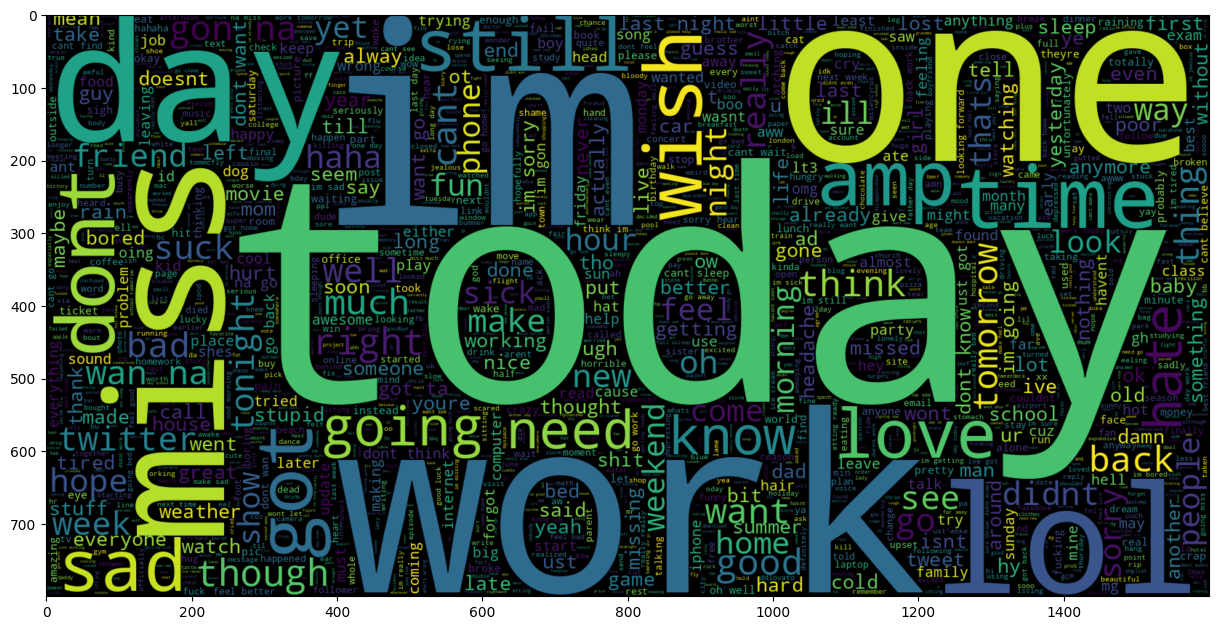

In [36]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

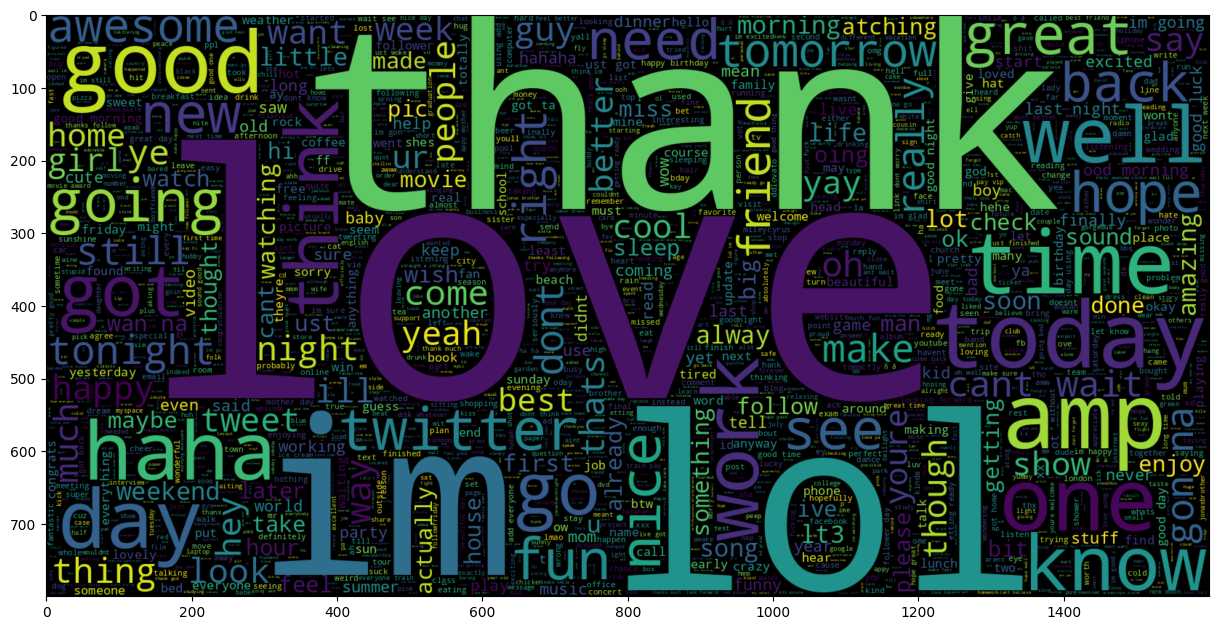

In [37]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [38]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [39]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example raw text data (Replace this with your actual dataset)
documents = ["This is a sample document.", "Another document with different words.", "Machine learning is fun!"]

# Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(documents)  # Ensure you're passing raw text, not a transformed matrix

print(f'Vector fitted.')
print('No. of feature_words:', len(vector.get_feature_names_out()))


Vector fitted.
No. of feature_words: 11


In [42]:
print(X.shape)
print(y.shape)

(3, 11)
(200000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Example dataset
documents = ["Text data sample 1", "Another text sample", "Machine learning sample"]  # Ensure this matches y
y = [0, 1, 1]  # Labels (should match the number of documents)

# Convert raw documents to TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(documents)

# Ensure X and y sizes match before splitting
print(f"X shape: {X.shape}, y length: {len(y)}")

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Data split successful!")


X shape: (3, 6), y length: 3
Data split successful!


In [48]:
print("X_train shape:", X_train.shape)  # Works because X_train is a sparse matrix
print("y_train length:", len(y_train))  # Fix: Use len() instead of .shape
print()
print("X_test shape:", X_test.shape)
print("y_test length:", len(y_test))


X_train shape: (2, 6)
y_train length: 2

X_test shape: (1, 6)
y_test length: 1


# Model Building <a id="7"></a>

### Model evaluating function

In [49]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 0.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



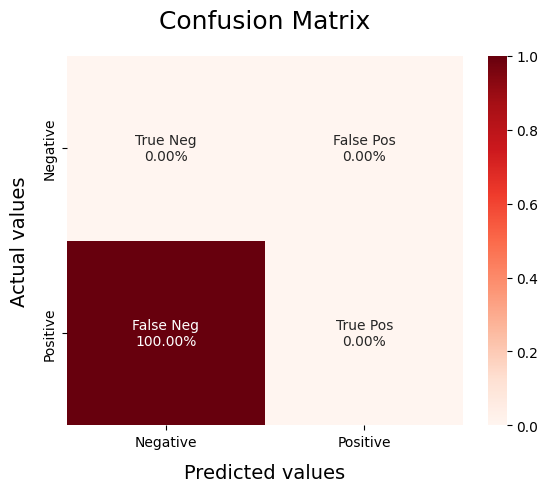

In [50]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 0.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



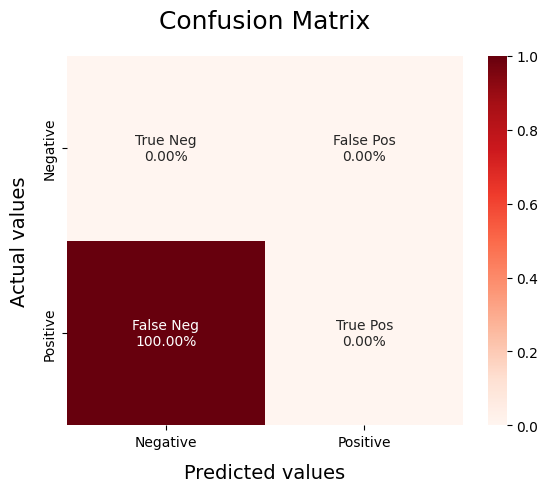

In [51]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 0.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



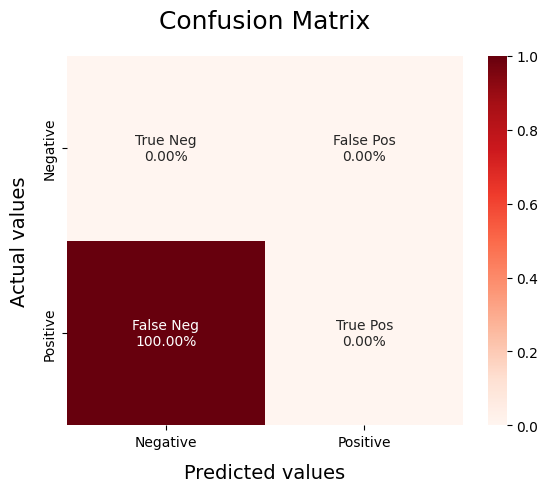

In [52]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 0.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



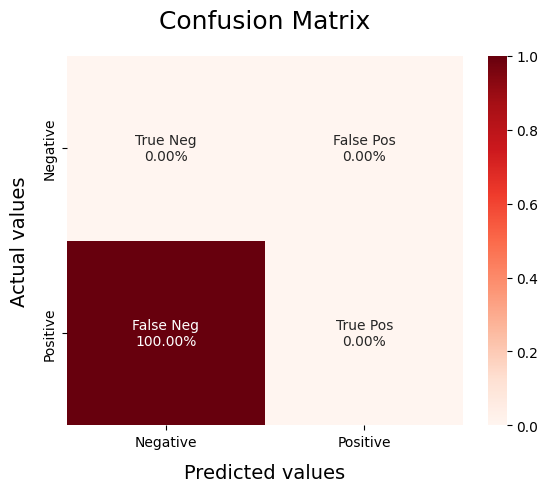

In [53]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [55]:
pip install keras tensorflow


# RNN <a id="12"></a>

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [57]:
# Corrected Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re


In [44]:
import keras
keras.__version__

'3.8.0'

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

# Define maximum words and sequence length
max_words = 5000
max_len = 200

# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit tokenizer on text data
tokenizer.fit_on_texts(data['processed_tweets'])  # Ensure 'data' is a DataFrame

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['processed_tweets'])

# Pad sequences to ensure uniform input size
tweets = pad_sequences(sequences, maxlen=max_len)

# Print the processed tweet sequences
print(tweets)


[[   0    0    0 ...    0    0  753]
 [   0    0    0 ...  515  255 2242]
 [   0    0    0 ... 1938   56   59]
 ...
 [   0    0    0 ... 4065   38    2]
 [   0    0    0 ...    0  117  878]
 [   0    0    0 ...  655  330   36]]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers, backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

# Define model
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64, dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint (use `.keras` instead of `.hdf5`)
checkpoint2 = ModelCheckpoint(
    "rnn_model.keras",  # Changed from .hdf5 → .keras
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_freq='epoch'
)

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint2])


Epoch 1/100
1305/5000 ━━━━━━━━━━━━━━━━━━━━ 6:40 108ms/step - accuracy: 0.6654 - loss: 0.5932

KeyboardInterrupt: 

In [65]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Negative


In [67]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the model (use .keras instead of .hdf5)
model = keras.models.load_model('rnn_model.keras')

# Sample input text
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])

# Pad sequence
test = pad_sequences(sequence, maxlen=max_len)

# Predict
pred = model.predict(test)[0][0]  # Extract the scalar value

# Interpret and print the result
if pred > 0.5:
    print('Positive')
else:
    print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
Positive


In [102]:
sequence = tokenizer.texts_to_sequences(['mahadevprasad is a bad boy'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Negative


# Model Saving, Loading and Prediction <a id="13"></a>

In [81]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [75]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [71]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [86]:
import pickle
import keras.models

def load_models():
    # Load the vectorizer
    with open("vectoriser.pickle", "rb") as vec_file:
        vectoriser = pickle.load(vec_file)

    # Load the Keras model correctly using keras.models.load_model
    model = keras.models.load_model("rnn_model.keras")  # Corrected from `pickle.load()`

    return vectoriser, model  # Return both the vectorizer and model


In [88]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences

def predict(vectoriser, model, text):
    # Preprocess the text
    processed_text = [process_tweets(sen) for sen in text]  # Ensure `process_tweets()` is defined

    # Transform text correctly using tokenizer or vectorizer
    try:
        # If using a Tokenizer (e.g., for LSTM model)
        text_data = vectoriser.texts_to_sequences(processed_text)  # Convert to sequences
        text_data = pad_sequences(text_data, maxlen=200)  # Ensure same max length as training
    except AttributeError:
        # If using a CountVectorizer (for traditional ML models)
        text_data = vectoriser.transform(processed_text)

    # Predict sentiment
    sentiment = model.predict(text_data)

    # Convert to labels
    labels = ["Negative" if pred < 0.5 else "Positive" for pred in sentiment]

    # Create DataFrame
    df = pd.DataFrame(list(zip(text, labels)), columns=["text", "sentiment"])
    return df


In [89]:
import pickle
from keras.models import load_model

def load_models():
    with open("vectoriser.pickle", "rb") as vec_file:
        vectoriser = pickle.load(vec_file)  # Ensure this matches training method

    model = load_model("rnn_model.keras")  # Load Keras model correctly

    return vectoriser, model


In [91]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences

def predict(tokenizer, model, text):
    # Preprocess the text
    processed_text = [process_tweets(sen) for sen in text]  # Ensure process_tweets() is defined

    # Convert to sequences
    text_sequences = tokenizer.texts_to_sequences(processed_text)

    # Pad sequences (Ensure maxlen is the same as during training)
    maxlen = 200  # Replace with the actual maxlen used in training
    text_data = pad_sequences(text_sequences, maxlen=maxlen)

    # Ensure numpy array format
    text_data = np.array(text_data)

    # Predict sentiment
    sentiment_scores = model.predict(text_data)

    # Convert probabilities to labels (assuming binary classification)
    labels = ["Negative" if score < 0.5 else "Positive" for score in sentiment_scores.flatten()]

    # Create DataFrame
    df = pd.DataFrame(list(zip(text, labels)), columns=["text", "sentiment"])
    return df


In [92]:
def predict(vectorizer, model, text):
    # Preprocess the text
    processed_text = [process_tweets(sen) for sen in text]

    # Transform using CountVectorizer
    text_data = vectorizer.transform(processed_text)

    # Convert sparse matrix to dense array (TensorFlow might require this)
    text_data = text_data.toarray()

    # Predict sentiment
    sentiment_scores = model.predict(text_data)

    # Convert predictions to labels
    labels = ["Negative" if score < 0.5 else "Positive" for score in sentiment_scores.flatten()]

    # Create DataFrame
    df = pd.DataFrame(list(zip(text, labels)), columns=["text", "sentiment"])
    return df


In [93]:
import pickle
from keras.models import load_model

def load_models():
    with open("vectoriser.pickle", "rb") as vec_file:
        vectoriser = pickle.load(vec_file)  # Load vectorizer

    model = load_model("rnn_model.keras")  # Load Keras model properly
    return vectoriser, model


In [100]:
if __name__ == "__main__":
    vectoriser, model = load_models()  # Load vectorizer & model properly
    text = ["data scientist is the worst job"]
    df = predict(vectoriser, model, text)
    print(df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
                              text sentiment
0  data scientist is the worst job  Positive
